## WIELORĘKI NIESTACJONARNY BANDYTA: analiza parametru epsilon w metodzie epsilon-greedy

In [2]:
import random
import matplotlib as plt
import numpy as np
from pylab import normal

Bandyta stara się grać jak najwięcej na maszynie, 
na której zdobywa się największe nagrody.


Przez niestacjonarność rozumiemy ze 
ta najbardziej opłacalna maszyna nie jest od początku do końca tą samą maszyną tylko moze 
zmienic się na inną po jakimś czasie.

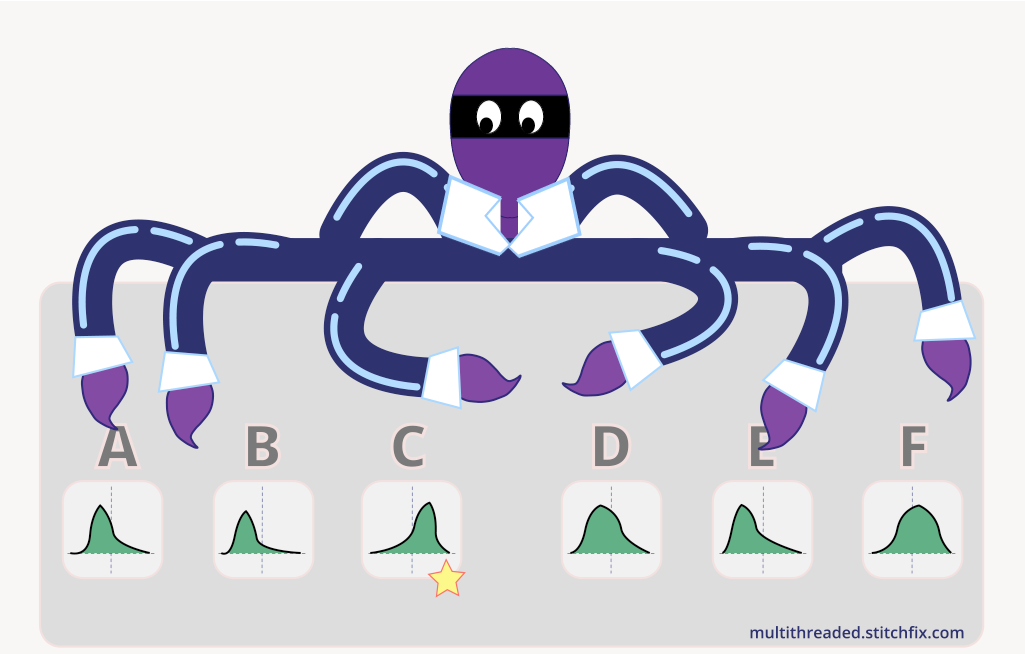

In [44]:
#definiujemy klasę Arm, która będzie reprezentować ramię bandyty
#jedno ramie gra na jednej maszynie 
class Arm:
    #z jakiego rozkladu bedziemy losowac(srednia i wariancja)
    def __init__(self, meanReturn, varianceReturn):
        self.meanReturn = meanReturn
        self.varianceReturn = varianceReturn
        
    #zmiana wartosci sredniej w rozkladzie wedlug którego losowane są nagrody
    def walk(self, meanStep, varianceStep):
        walkSize = normal(meanStep,varianceStep)
        self.meanReturn+=walkSize
        return walkSize
    
    #losowanie nagrody
    def pull(self):
        rValue = self.meanReturn
        
        if (self.varianceReturn>0):
            rValue = normal(self.meanReturn, self.varianceReturn)
        
        return rValue

In [45]:
class Bandit:
    
    def __init__(self, numberOfArms, armMean, variance):
        self.numberOfArms = numberOfArms
        self.armMean = armMean
        self.variance = variance
        #przy inicjalizacji bandyty, tworzymy dla niego ramiona(kazde gra na jednej maszynie)
        self.arms = []
        for arm in range(numberOfArms):
            arm = Arm(0, variance)
            self.arms.append(arm)
        self.bestArm = self.calculateBestArm()
                
    def reset(self):
        self.arms = []
        for arm in range(self.numberOfArms):
            armRealMean = normal(self.armMean, self.variance)
            arm = Arm(armRealMean, self.variance)
            self.arms.append(arm)
        self.bestArm = self.calculateBestArm()
    #zmiana rozkladu losowania nagrody 
    def walk(self, meanStep = 0, varianceStep = 0.01):
        for arm in self.arms:
            arm.walk(meanStep, varianceStep)

        self.bestArm = self.calculateBestArm()
        
 
    def pull(self, armIndex):
        
        return self.arms[armIndex].pull()
        
    
    def calculateBestArm(self):
        armMeanValues = []
        for arm in self.arms:
            armMeanValues.append(arm.meanReturn)
        return np.argmax(armMeanValues)

In [46]:
class EpsilonGreedy:
    
    def __init__(self, bandit, alpha, eps):
        
        self.bandit = bandit
        self.numberOfArms = len(self.bandit.arms)
        self.Q = [0.0]*self.numberOfArms
        self.alpha = alpha
        self.eps = eps
        
    def learn(self, reward, armIndex):
        
        stepSize= self.alpha
        
        # obliczamy wartość Q       
        self.Q[armIndex]+= stepSize*(reward - self.Q[armIndex])      
        
    def policy(self):
        armIndex = 0            
        #decyzja eksplorujemy czy skupiamy się na obecnie najlepszej maszynie
        explore_chance = random.random()
        if (explore_chance < self.eps):
            #losujemy ramie z ktorego teraz bedziemy losowac(maszyne)
            armIndex = random.randint(0,self.numberOfArms-1) 
        else:
            #wybieramy aktualnie najbardziej korzystna maszyne
            armIndex= np.argmax(self.Q)

        return armIndex
    
    def reset(self):
        self.Q = [0.0]*self.numberOfArms
        

In [65]:
def testAlgorithm(bandit, algorithm, numberOfRuns, numberOfPulls):

    returns = [0.0]*numberOfPulls
    algorithmRewards= returns


    for run in range(numberOfRuns):
        
        algorithm.reset()        
        
        for pull in range(numberOfPulls):
            
            #pytamy algorytm na ktorej maszynie teraz gramy(ramie)
            arm = algorithm.policy()
            #gramy i zbieramy nagrode
            reward = bandit.pull(arm)
            #algorytm uczy sie na podstawie zebranej nagrody
            algorithm.learn(reward, arm)
            
            rewardArray = algorithmRewards
            stepSize = 1/(run+1)   
    
            rewardArray[pull]+=stepSize*(reward - rewardArray[pull])
            bandit.walk()
            
        #resetujemy bandyte
        bandit.reset()

    #zwracamy liste srednich nagrod w kazdym runnie
    return(algorithmRewards)

In [ ]:
bandit = Bandit(10,0,1)
results = testAlgorithm(bandit, algorithm, 5000, 20000)
eps_values=[1/128, 1/64,1/32,1/16,1/8,1/4]

for eps in eps_values:
    algorithm = EpsilonGreedy(bandit, alpha=0.1,eps= eps)
    results = testAlgorithm(bandit, algorithm, 100, 100)
    point= np.mean(results[10000:20000])
    reward.append(punkt)


In [43]:
reward

[1.7602259426045792,
 1.7999042072610303,
 1.8035012794771645,
 1.7348541947381808,
 1.6270663717614644,
 1.3716813408977935]

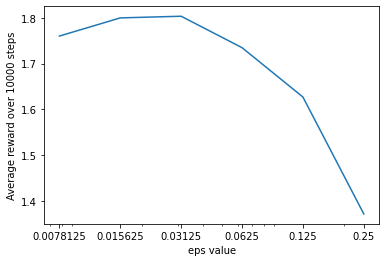

In [42]:
# GENEROWANIE WYKRESU
plt.pyplot.figure()
plt.pyplot.semilogx(eps_values, reward)
plt.pyplot.xlabel('eps value')
plt.pyplot.ylabel('Average reward over 10000 steps')
plt.pyplot.xticks(eps_values, eps_values)
plt.pyplot.show()

